In [1]:
## Import library gb_mep
import gb_mep

In [2]:
## Load all required files after importing relevant libraries
import pickle
import numpy as np
import pandas as pd
santander_train = pd.read_csv('../data/santander_train.csv') 
santander_test = pd.read_csv('../data/santander_test.csv') 
santander_distances = np.load('../data/santander_distances.npy')
with open('../data/santander_dictionary.pkl', 'rb') as f:
    santander_dictionary = pickle.load(f)


In [3]:
santander_train

,start_id,end_id,start_time,end_time
0,722,131,0.483492,13.192747
1,531,460,0.484768,23.477447
2,515,603,0.624303,4.196019
3,804,689,0.807900,13.604670
4,740,48,1.568787,31.912915
...,...,...,...,...
6453258,302,637,241912.321072,241919.498489
6453259,740,342,241912.686823,241919.489431
6453260,327,324,241913.941339,241917.596443
6453261,224,337,241913.962367,241919.498538


In [4]:
G = gb_mep.gb_mep(df=santander_train, id_map=santander_dictionary, distance_matrix=santander_distances)


In [5]:
res1 = G.fit(x0=-np.ones(3), subset_nodes=range(3), start_times=False, end_times=True, distance_start=False, distance_end=False, thresh=1)
res2 = G.fit(x0=-np.ones(3), subset_nodes=range(3), start_times=True, end_times=False, distance_start=False, distance_end=False, thresh=1)
res3 = G.fit(x0=-np.ones(5), subset_nodes=range(3), start_times=True, end_times=True, distance_start=False, distance_end=False, thresh=1)

In [14]:
res4 = G.fit(x0=-np.ones(4), subset_nodes=range(3), start_times=True, end_times=False, distance_start=True, distance_end=False, thresh=1)

In [29]:
res5 = {}
for node in res4:
    r = G.fit(x0=np.concatenate((res4[node].x, res3[node].x[3:5])), subset_nodes=[node], start_times=True, end_times=True, distance_start=True, distance_end=False, thresh=1)
    res5[node] = r[node]

In [41]:
index = 2
q_pp = G.pvals_poisson_process(param=G.N[index]/G.T, node_index=index)
pp = np.exp(res1[index].x)
pp[2] += pp[1]
q_mep = G.pvals_mep(params=pp, node_index=index)
pp = np.exp(res2[index].x)
pp[2] += pp[1]
q_sep = G.pvals_sep(params=pp, node_index=index)
pp = np.exp(res3[index].x)
pp[2] += pp[1]; pp[4] += pp[3]
q_smep = G.pvals_smep(params=pp, node_index=index)
pp = np.exp(res4[index].x)
pp[2] += pp[1]
q_gbmep_self = G.pvals_gbmep_start(params=pp, node_index=index, thresh=1)
pp = np.exp(res5[index].x)
pp[2] += pp[1]; pp[5] += pp[4]
q_gbmep = G.pvals_gbmep_start_self(params=pp, node_index=index, thresh=1)

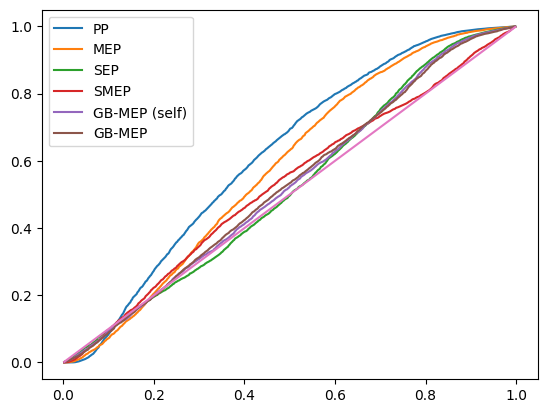

In [42]:
x = np.linspace(start=0, stop=1, num=501, endpoint=False)[1:]
y1 = np.percentile(a=q_pp, q=x*100)
y2 = np.percentile(a=q_mep, q=x*100)
y3 = np.percentile(a=q_sep, q=x*100)
y4 = np.percentile(a=q_smep, q=x*100)
y5 = np.percentile(a=q_gbmep_self, q=x*100)
y6 = np.percentile(a=q_gbmep, q=x*100)
import matplotlib.pyplot as plt
plt.plot(x,y1,label='PP')
plt.plot(x,y2,label='MEP')
plt.plot(x,y3, label='SEP')
plt.plot(x,y4, label='SMEP')
plt.plot(x,y5, label='GB-MEP (self)')
plt.plot(x,y6, label='GB-MEP')
plt.legend()
plt.plot(x,x)

In [43]:
import scipy.stats as stats
k1 = stats.kstest(q_pp, stats.uniform.cdf)
k2 = stats.kstest(q_mep, stats.uniform.cdf)
k3 = stats.kstest(q_sep, stats.uniform.cdf)
k4 = stats.kstest(q_smep, stats.uniform.cdf)
k5 = stats.kstest(q_gbmep_self, stats.uniform.cdf)
k6 = stats.kstest(q_gbmep, stats.uniform.cdf)

In [44]:
k1, k2, k3, k4, k5, k6

(KstestResult(statistic=0.2036400956032165, pvalue=9.89551575438379e-156, statistic_location=0.7404082454861205, statistic_sign=-1),
 KstestResult(statistic=0.16891766524281548, pvalue=5.621669427286172e-107, statistic_location=0.7904633326901223, statistic_sign=-1),
 KstestResult(statistic=0.09125739496804786, pvalue=2.1456219472757988e-31, statistic_location=0.9060114933287036, statistic_sign=-1),
 KstestResult(statistic=0.06674414952329083, pvalue=5.5452132737444265e-17, statistic_location=0.5437933298511597, statistic_sign=-1),
 KstestResult(statistic=0.08307687164883681, pvalue=4.3759052140805947e-26, statistic_location=0.9090721878080874, statistic_sign=-1),
 KstestResult(statistic=0.07592546156111746, pvalue=7.450563220063839e-22, statistic_location=0.9176116442309067, statistic_sign=-1))